In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
mushroom_df = pd.read_csv('mushrooms.csv') # csv in same working directory

In [3]:
mushroom_df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushroom_df.shape

(8124, 23)

In [5]:
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
# We have two unique classes, edible and poisionous denoted "e" and "p" in the class column
# Thought: Every mushroom has veil-type "p" so can disregard that column for this set

In [7]:
# Playing around with different views of data, thought: odor = chemical = class componenet
mushroom_df.groupby(['class', 'odor']).count()

cap-shape  cap-surface  cap-color  bruises  gill-attachment  \
class odor                                                                
e     a           400          400        400      400              400   
      l           400          400        400      400              400   
      n          3408         3408       3408     3408             3408   
p     c           192          192        192      192              192   
      f          2160         2160       2160     2160             2160   
      m            36           36         36       36               36   
      n           120          120        120      120              120   
      p           256          256        256      256              256   
      s           576          576        576      576              576   
      y           576          576        576      576              576   

            gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  ...  \
class odor                                                                ...   
e     a              400        400         400          400         400  ...   
      l              400        400         400          400         400  ...   
      n             3408       3408        3408         3408        3408  ...   
p     c              192        192         192          192         192  ...   
      f             2160       2160        2160         2160        2160  ...   
      m               36         36          36           36          36  ...   
      n              120        120         120          120         120  ...   
      p              256        256         256          256         256  ...   
      s              576        576         576          576         576  ...   
      y              576        576         576          576         576  ...   

            stalk-surface-below-ring  stalk-color-above-ring  \
class odor                                                     
e     a                          400                     400   
      l                          400                     400   
      n                         3408                    3408   
p     c                          192                     192   
      f                         2160                    2160   
      m                           36                      36   
      n                          120                     120   
      p                          256                     256   
      s                          576                     576   
      y                          576                     576   

            stalk-color-below-ring  veil-type  veil-color  ring-number  \
class odor                                                               
e     a                        400        400         400          400   
      l                        400        400         400          400   
      n                       3408       3408        3408         3408   
p     c                        192        192         192          192   
      f                       2160       2160        2160         2160   
      m                         36         36          36           36   
      n                        120        120         120          120   
      p                        256        256         256          256   
      s                        576        576         576          576   
      y                        576        576         576          576   

            ring-type  spore-print-color  population  habitat  
class odor                                                     
e     a           400                400         400      400  
      l           400                400         400      400  
      n          3408               3408        3408     3408  
p     c           192                192         192      192  
      f          2160               2160        2160     2160  
      m            36           

In [8]:
# From the above we see that we only have data on edible mushrooms in three odor types: a, l, n.
# the only overlapping class between the two is the "n" odor class.

In [9]:
# Preparing to feed Algorithm:
labels = mushroom_df['class']
features = mushroom_df.drop(columns=['class'])

In [10]:
print(labels[0:5:1])

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object


In [11]:
labels.replace('p',0,inplace=True)
labels.replace('e',1, inplace=True)
# Poison Will be equal to zero and edible will be equal to 1

In [12]:
labels[0:5:1]

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [13]:
features[0:5:1]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [14]:
#convert features to values between 0 & 1
features = pd.get_dummies(features)
features[0:5]

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
features = features.values.astype('float32')
labels = labels.values.astype('float32')
print(features[0:2])
print(labels[0:2])
print(len(features[0]))

[[0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[0. 1.]
117


In [16]:
# split our dataset
features_train, features_test, labels_train, labels_test=train_test_split(features,labels,test_size=0.2)
features_train, features_validation, labels_train, labels_validation = train_test_split(features,labels,test_size=0.2)

In [17]:
# Creating our Model
model=keras.Sequential([keras.layers.Dense(20,activation=tf.nn.relu),
                        keras.layers.Dense(2,activation='softmax')])

W0917 20:09:21.976559 4612195776 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [19]:
history = model.fit(features_train,labels_train,epochs=20, validation_data=(features_validation, labels_validation))

Train on 6499 samples, validate on 1625 samples
Epoch 1/20
6499/6499 [==============================] - 0s 67us/sample - loss: 0.2159 - acc: 0.9351 - val_loss: 0.0602 - val_acc: 0.9914
Epoch 2/20
6499/6499 [==============================] - 0s 50us/sample - loss: 0.0333 - acc: 0.9968 - val_loss: 0.0178 - val_acc: 0.9988
Epoch 3/20
6499/6499 [==============================] - 0s 50us/sample - loss: 0.0118 - acc: 0.9989 - val_loss: 0.0081 - val_acc: 1.0000
Epoch 4/20
6499/6499 [==============================] - 0s 49us/sample - loss: 0.0057 - acc: 0.9997 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 5/20
6499/6499 [==============================] - 0s 48us/sample - loss: 0.0033 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 6/20
6499/6499 [==============================] - 0s 49us/sample - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 7/20
6499/6499 [==============================] - 0s 52us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 

In [20]:
prediction_features=model.predict(features_test)
performance=model.evaluate(features_test,labels_test)
print(performance)

1625/1625 [==============================] - 0s 22us/sample - loss: 8.3750e-05 - acc: 1.0000
[8.37499275803566e-05, 1.0]


In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

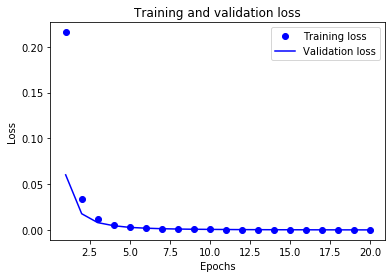

In [22]:
# Checking Overfit
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()